## Задача №1

In [33]:
from random import *
import numpy as np
import pandas as pd

In [160]:
a = np.array([randrange(40,50) for i in range(4000)]).reshape(2000,2)
df = pd.DataFrame(a, columns=['x', 'y'])
df.to_csv('XY.csv',index = False, sep =';')
print(df)

       x   y
0     45  43
1     41  43
2     42  46
3     47  48
4     49  47
...   ..  ..
1995  46  40
1996  42  40
1997  47  44
1998  49  48
1999  42  45

[2000 rows x 2 columns]


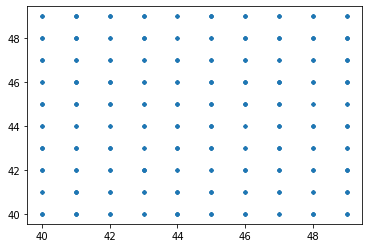

In [168]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], marker ='.',linewidths=0.5)
plt.show()

## Задача №2

In [162]:
dict_of_point = []


for i in range(len(df['x'])):
    point = df.iloc[i]
    k = 0
    for j in dict_of_point:
        if point['x'] == j['x'] and point['y'] == j['y']:
            j['summ'] += 1
            k = 1
    if k == 0:
        dict_of_point.append({'x':point['x'],'y':point['y'],'summ':1})


In [170]:
dict_of_point[1:5]

[{'x': 41, 'y': 43, 'summ': 22},
 {'x': 42, 'y': 46, 'summ': 26},
 {'x': 47, 'y': 48, 'summ': 24},
 {'x': 49, 'y': 47, 'summ': 23}]

In [164]:
dop2 = pd.DataFrame([{'x.y': (j['x']+(j['y'])/100), 'summ': j['summ']} for j in dict_of_point])
dop2

,x.y,summ
0,45.43,23
1,41.43,22
2,42.46,26
3,47.48,24
4,49.47,23
...,...,...
95,44.48,13
96,47.49,20
97,44.49,14
98,45.49,27


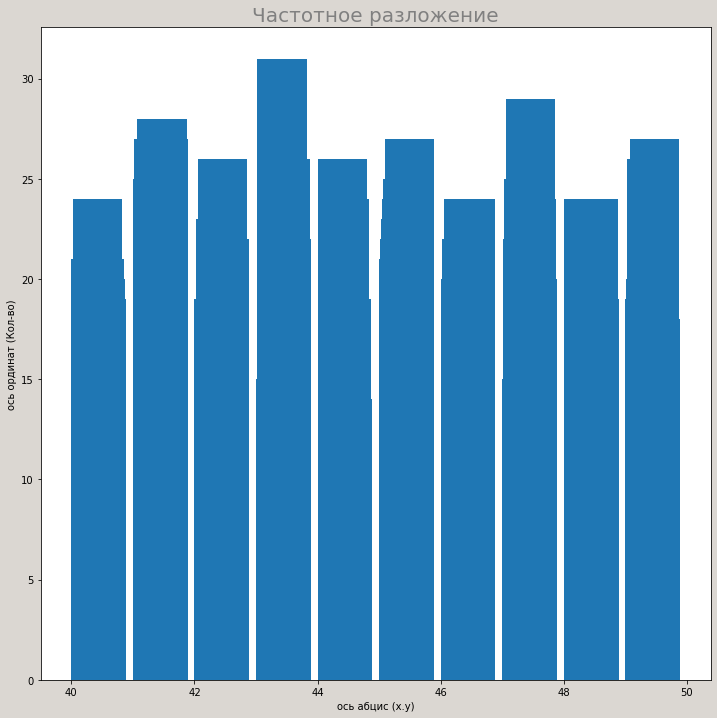

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(dop2['x.y'], dop2['summ'])
fig.set(facecolor = '#DBD7D2')
ax.set_facecolor('white')
ax.set_title('Частотное разложение', color = 'grey', size = 20)
ax.set_xlabel('ось абцис (x.y)')
ax.set_ylabel('ось ординат (Кол-во)')
fig.set_figwidth(12)
fig.set_figheight(12)
plt.show()

In [169]:
x0 = -2
x1 = 1
x3 = 0
y0 = 0
y1 = 3
y3 = 0
z0 = 0
z1 = 3
z3 = 0
R = 3


In [170]:
a = (y1 - y0)/(x1 - x0)
b = y0 - y3
c = (z1 - z0)/(x1 - x0)
d = z0 - z3

In [171]:
p = (1 + a**2 + c**2)
q = (2*a*b + 2*d*c - 2*x3 - 2*x0*(a**2 + c**2))
l = x3**2 + x0*(a**2 + c**2) - 2*a*b*x0 - 2*d*c + b**2 + d**2 - R**2

In [172]:
Disc = q**2 - 4*p*l

In [173]:
x_1 = (-q + Disc**(0.5))/(2*p)
print('x1:{}'.format(x_1))
y_1 = ((x_1 - x0)*(y1 - y0))/(x1 - x0) + y0
print('y1:{}'.format(y_1))
z_1 = ((x_1 - x0)*(z1 - z0))/(x1 - x0) + z0
print('z1:{}'.format(z_1))

x1:1.1387328290318877
y1:3.1387328290318877
z1:3.1387328290318877


In [40]:
x_2 = (-q - Disc**(0.5))/(2*p)
x_2

-1.7320508075688774

In [116]:
class Sphere:
    __slots__ = ['x3', 'y3', 'z3', 'R']
    
    def __init__(self, x, y, z,R):
        self.x3 = x
        self.y3 = y
        self.z3 = z
        self.R = R
        
    def move_x(self, speed):
        self.x3 = self.x3 + speed
    
    def move_y(self, speed):
        self.y3 = self.y3 + speed
        
    def move_z(self, speed):
        self.z3 = self.z3 + speed
        
class Vector:
    __slots__ = ['x0', 'y0', 'z0','x1', 'y1', 'z1', 'color']
    
    def __init__(self, x0, y0, z0, x1, y1, z1):
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1
        self.z0 = z0
        self.z1 = z1
        self.color = None

In [153]:
class Camera:
    
    def __init__(self):
        self.w_dots = 1280
        self.h_dots = 720
        self.width = 16
        self.height = 9
        self.center = [10,0,0]
        self.camera_coor = [self.center, [self.center[0]+6, self.center[1], self.center[2]]]
        
    def zoom(self,speed):
        self.center = self.center + speed
        self.camera_coor = [self.center, [self.center[0]+6, self.center[1], self.center[2]]]   
        

In [154]:
def generating_vectors(camera):
    import numpy as np
    max_y = max(camera.center[1]-camera.width/2,camera.center[1]+camera.width/2)
    min_y = min(camera.center[1]-camera.width/2,camera.center[1]+camera.width/2)
    max_z = max(camera.center[2]-camera.height/2,camera.center[2]+camera.height/2)
    min_z = min(camera.center[2]-camera.height/2,camera.center[2]+camera.height/2)
    print(max_y, min_y, max_z, min_z)
    dots_y = np.linspace(min_y,max_y,num = camera.w_dots)
    dots_z = np.linspace(min_z,max_z,num = camera.h_dots)
    list_of_v = []
    for i in dots_y:
        for j in dots_z:
            list_of_v.append(Vector(camera.camera_coor[1][0],camera.camera_coor[1][1],camera.camera_coor[1][2],
                                    camera.center[0],i,j))
    return list_of_v      

In [155]:
main_camera = Camera()
vect = generating_vectors(main_camera)

8.0 -8.0 4.5 -4.5


In [156]:
for i in range(10):
    print('x0 - {}'.format(vect[i].x0))
    print('y0 - {}'.format(vect[i].y0))
    print('z0 - {}'.format(vect[i].z0))
    print('x1 - {}'.format(vect[i].x1))
    
    print('y1 - {}'.format(vect[i].y1))
    
    print('z1 - {}'.format(vect[i].z1))

x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.5
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.4874826147426985
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.474965229485396
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.462447844228095
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.449930458970793
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.437413073713491
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.424895688456189
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.412378303198888
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.399860917941585
x0 - 16
y0 - 0
z0 - 0
x1 - 10
y1 - -8.0
z1 - -4.387343532684284


In [157]:
Sph1 = Sphere(0,0,0,3)

In [167]:
def distance(x1, y1, z1, x2, y2, z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(0.5)

def intersection(spher, vect):
    x1 = vect.x1
    z1 = vect.z1
    y1 = vect.y1
    
    x0 = vect.x0
    y0 = vect.y0
    z0 = vect.z0

    
    x3 = spher.x3
    y3 = spher.y3
    z3 = spher.z3
    
    R = spher.R
    
    a = (y1 - y0)/(x1 - x0)
    b = y0 - y3
    c = (z1 - z0)/(x1 - x0)
    d = z0 - z3    
    
    p = (1 + a**2 + c**2)
    q = (2*a*b + 2*d*c - 2*x3 - 2*x0*(a**2 + c**2))
    l = x3**2 + x0*(a**2 + c**2) - 2*a*b*x0 - 2*d*c + b**2 + d**2 - R**2
    
    Disc = q**2 - 4*p*l
    print(Disc)
    if Disc < 0:
        vect.color = 0
    
    if Disc == 0:
        x_1 = (-q)/(2*p)
        y_1 = ((x_1 - x0)*(y1 - y0))/(x1 - x0) + y0
        z_1 = ((x_1 - x0)*(z1 - z0))/(x1 - x0) + z0
        d1 = distance(x_1, y_1, z_1, x0, y0, z0)
        vect.color = d1
    
    if Disc > 0: 
        x_1 = (-q + Disc**(0.5))/(2*p)
        y_1 = ((x_1 - x0)*(y1 - y0))/(x1 - x0) + y0
        z_1 = ((x_1 - x0)*(z1 - z0))/(x1 - x0) + z0
        print(x_1,y_1,z_1)
        d1 = distance(x_1, y_1, z_1, x0, y0, z0)
        
        x_2 = (-q - Disc**(0.5))/(2*p)
        y_2 = ((x_2 - x0)*(y1 - y0))/(x1 - x0) + y0
        z_2 = ((x_2 - x0)*(z1 - z0))/(x1 - x0) + z0
        print(x_2,y_2,z_2)
        d2 = distance(x_2, y_2, z_2, x0, y0, z0)
        if d1 > d2:
            vect.color = d2
        else: 
            vect.color = d1
        

In [146]:
for i in vect:
    intersection(Sph1, i)

In [151]:
help_ = []
for i in range(len(vect)):
    help_.append(vect[i].color)
    if vect[i].color == 0:
        print(1)

In [152]:
help_

[18.15548424445574,
 18.12037443171381,
 18.08533363254778,
 18.05036203040608,
 18.01545980885382,
 17.980627151570275,
 17.945864242346254,
 17.91117126508141,
 17.876548403781797,
 17.841995842557026,
 17.807513765617706,
 17.77310235727281,
 17.738761801926824,
 17.704492284077165,
 17.670293988311457,
 17.63616709930468,
 17.602111801816516,
 17.568128280688484,
 17.534216720841233,
 17.500377307271656,
 17.46661022505011,
 17.432915659317523,
 17.39929379528261,
 17.365744818218932,
 17.33226891346202,
 17.29886626640646,
 17.265537062503014,
 17.232281487255612,
 17.199099726218417,
 17.1659919649929,
 17.132958389224775,
 17.099999184601042,
 17.067114536846955,
 17.034304631722986,
 17.00156965502175,
 16.968909792565004,
 16.93632523020046,
 16.903816153798736,
 16.871382749250287,
 16.83902520246221,
 16.806743699355074,
 16.774538425859845,
 16.742409567914656,
 16.71035731146159,
 16.678381842443514,
 16.64648334680083,
 16.614662010468265,
 16.582918019371558,
 16.5512515

In [140]:
h = Vector(26,0,0,20,-8,-4.5)
intersection(Sph1, h)
print(h.color)


17.337929688481513


In [168]:
h = Vector(-2,0,0,1,3,3)
Sph = Sphere(0,0,0,3)
intersection(Sph1, h)
print(h.color)

220.0
1.1387328290318877 3.1387328290318877 3.1387328290318877
-3.805399495698554 -1.8053994956985544 -1.8053994956985544
3.1270436545091247
